# Classifiability

How many weather types should there be?

In [9]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from paraguayfloodspy.weather_type import XrEofCluster

In [20]:
%matplotlib inline
savefigs = True

Parameters

In [19]:
%run ../config/WeatherTypes.mk
print(WTEAST, WTWEST, WTSOUTH, WTNORTH)
print(WT_PROP, PC_SCALE)

315 295 -30 -15
0.9 1


Load in the raw data

In [15]:
psi = xr.open_dataset("../data/derived/psi_850.nc")
psi = psi.sel(lon = slice(WTWEST, WTEAST), lat = slice(WTNORTH, WTSOUTH))

In [16]:
n_clusters = np.arange(2,10)
class_index = np.zeros(n_clusters.shape)
for i,nc in enumerate(n_clusters):
    _, _, ci = XrEofCluster(
        psi, 
        n_clusters=nc, # How many weather types to create?
        prop=WT_PROP, # What proportion of variance should be retained?
        nsim=50, # How many random initializations to compute?
        variable='anomaly',
        pcscaling=PC_SCALE,
        verbose = False # get useful info from the algorithm
    )
    class_index[i] = ci

/usr/local/miniconda3/envs/pyfloods/lib/python3.6/site-packages/eofs/xarray.py:413: FutureWarning: Coordinate has been deprecated. Use IndexVariable instead.
  attrs={'long_name': 'eof_mode_number'})
/usr/local/miniconda3/envs/pyfloods/lib/python3.6/site-packages/eofs/xarray.py:178: FutureWarning: Coordinate has been deprecated. Use IndexVariable instead.
  attrs={'long_name': 'eof_mode_number'})


Number of EOFs retained is 3
Number of EOFs retained is 3
Number of EOFs retained is 3
Number of EOFs retained is 3
Number of EOFs retained is 3
Number of EOFs retained is 3
Number of EOFs retained is 3
Number of EOFs retained is 3


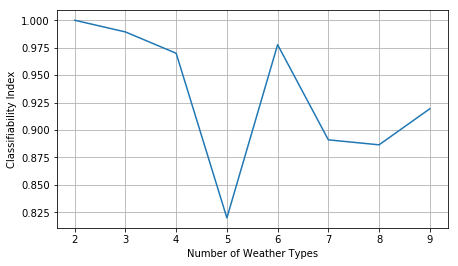

In [21]:
plt.figure(figsize=(7, 4))
plt.plot(n_clusters, class_index)
plt.xlabel("Number of Weather Types")
plt.ylabel("Classifiability Index")
plt.grid()
if savefigs:
    plt.savefig("../figs/WT_Classifiability.pdf", bbox_inches='tight')